# MAST Plasma Current

Infer plasma current from CCFE's Mega Ampere Spherical Tokamak using discrete magnetic diagnostic data.

> **Note:** The dataset files for this challenge should be available in the `fair_mast_data/plasma_current` directory.

## Overview
This notebook addresses the first of three Data Science challenges for the ITER International School 2024.

**Challenge Goal:** Reconstruct plasma current time-series waveforms from the Mega Ampere Spherical Tokamak (MAST) using magnetic field measurements.

The open-source MAST Data Catalog provides all data for this challenge. Credit to Samuel Jackson, Nathan Cummings, Saiful Khan, and the MAST community for creating this FAIR dataset.

## Description
Tokamaks measure plasma current with high precision. In this challenge, you must reconstruct plasma current waveforms by applying machine learning to magnetic diagnostic signals.

We've removed information about the location, orientation, and calibration of diagnostic measurements to prevent using traditional inference techniques.

This challenge presents a labeled regression problem. Your model must transform one-dimensional signals into accurate target waveforms.

The image below shows signals and targets from the first shot in the training dataset: 

![MAST Plasma Signals and Targets](../media/images/plasma_current.png)

## Dataset Information

The `./fair_mast_data/plasma_current` directory contains data files for the MAST Plasma Current challenge.

### Available Files
Both train and test files use a simple CSV format with a single header.

- `train.csv` - Training dataset
- `test.csv` - Test dataset

### Data Structure
- `index` - Unique identifier for each sample
- `time` - Measurement time in seconds
- `XMA_CCBV04:XMA_CCBV36` - Magnetic measurements from the center_column group in volts
- `XMA_OBR03:XMA_OBR17.1` - Magnetic measurements from the outer_discrete group in volts
- `plasma_current` - Target plasma current in kiloamperes (kA)

## Example

The code below demonstrates how to prepare a competition submission. This basic approach provides a starting point that you'll need to improve to achieve competitive scores.

First, we'll import the necessary libraries for data processing, visualization, and machine learning. Python libraries are organized at the top in three groups: standard library, third-party packages, and local modules.

In [529]:
# Standard library imports
import pathlib

# Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.pipeline

### Data Loading
First, we locate the data files. The `train.csv` and `test.csv` files are stored in the `fair_mast_data/plasma_current` directory. We use the `pathlib` library to find these files.

In [530]:
# Set the path to the fair_mast_data directory
path = pathlib.Path().absolute().parent / "fair_mast_data/plasma_current"
print(list(path.glob('*.csv')))


[WindowsPath('c:/Users/brussel/Documents/1. ITER Internship/data-science-challenges/fair_mast_data/plasma_current/linear_regression.csv'), WindowsPath('c:/Users/brussel/Documents/1. ITER Internship/data-science-challenges/fair_mast_data/plasma_current/test.csv'), WindowsPath('c:/Users/brussel/Documents/1. ITER Internship/data-science-challenges/fair_mast_data/plasma_current/train.csv')]


In [531]:
# Load the data into train and test DataFrames
train = pd.read_csv(path / "train.csv")
test = pd.read_csv(path / "test.csv")

# Print the first few rows of the train DataFrame
print(train.head())


   index     time  XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  \
0      0 -0.06560   -0.126953   -0.024414   -0.014648   -0.029297   -0.268555   
1      1 -0.06535   -0.129395   -0.024414   -0.017090   -0.031738   -0.273438   
2      2 -0.06510   -0.129395   -0.024414   -0.017090   -0.034180   -0.275879   
3      3 -0.06485   -0.131836   -0.024414   -0.017090   -0.031738   -0.278320   
4      4 -0.06460   -0.131836   -0.024414   -0.017090   -0.029297   -0.278320   

   XMA_OBR03  XMA_OBR03.1  XMA_OBR06  XMA_OBR06.1  XMA_OBR14  XMA_OBR14.1  \
0  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   
1  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   
2  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   
3  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   
4  -0.002441    -0.002441  -0.029297    -0.029297  -0.019531    -0.019531   

   XMA_OBR17  XMA_OBR17.1  shot_index  plasma_curr

### Model Pipeline
Create a scikit-learn pipeline to process training and test data consistently. This example uses a minimal pipeline setup.

In [532]:
pipe = sklearn.pipeline.make_pipeline(
    sklearn.linear_model.LinearRegression(),
)

### Data Preparation
We divide the training data into features (X) and target (y), then split into training and validation sets. This example uses all signal columns as features. A thorough understanding of your data before this step significantly improves results.

In [533]:
X, y = train.drop("plasma_current", axis=1), train.plasma_current
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    random_state=3,
)

X.head(2)

,index,time,XMA_CCBV04,XMA_CCBV12,XMA_CCBV20,XMA_CCBV28,XMA_CCBV36,XMA_OBR03,XMA_OBR03.1,XMA_OBR06,XMA_OBR06.1,XMA_OBR14,XMA_OBR14.1,XMA_OBR17,XMA_OBR17.1,shot_index
0,0,-0.06560,-0.126953,-0.024414,-0.014648,-0.029297,-0.268555,-0.002441,-0.002441,-0.031738,-0.031738,-0.019531,-0.019531,-0.021973,-0.021973,0
1,1,-0.06535,-0.129395,-0.024414,-0.017090,-0.031738,-0.273438,-0.002441,-0.002441,-0.031738,-0.031738,-0.019531,-0.019531,-0.024414,-0.024414,0


### Model Training and Evaluation

First, we fit the model to the training set and generate predictions for the validation set.

In [534]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

#### Understanding Model Evaluation Metrics

We evaluate model performance using multiple metrics. While the challenge uses only Mean Absolute Percentage Error (MAPE) for scoring, additional metrics provide valuable insights during development.

**Mean Absolute Percentage Error (MAPE)**

MAPE measures the average percentage difference between predicted and actual values. Mathematically, it's calculated as:

$MAPE = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|$

Where:
- $y_i$ represents the true plasma current value
- $\hat{y}_i$ represents the predicted plasma current value
- $n$ is the number of predictions being evaluated

**Why use MAPE for this challenge?**
- **Scale-independence**: MAPE expresses error as a percentage, making it useful for comparing performance across different datasets or plasma current magnitudes
- **Interpretability**: The percentage format is intuitive for understanding prediction accuracy
- **Competition metric**: This is the primary scoring metric for the challenge

**Mean Absolute Error (MAE)**

MAE measures the average magnitude of errors between predicted and actual values, without considering their direction. 

$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$

**Benefits of MAE:**
- **Same units**: Expressed in kiloamperes (kA), making it directly interpretable in the physical context
- **Robustness**: Less sensitive to outliers than squared error metrics
- **Direct interpretation**: Tells us the average absolute deviation in kA between predictions and actual values

In [535]:
# Calculate Mean Absolute Percentage Error (MAPE)
# Lower values indicate better model performance (0% is perfect)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE {mape:1.3f} (lower is better)")

# Calculate Mean Absolute Error (MAE) in kiloamperes
# This is more intuitive as it's in the same units as plasma current
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print(f"MAE {mae:1.3f} kA (lower is better)")

MAPE 5.023 (lower is better)
MAE 9.959 kA (lower is better)


### Making Predictions and Generating Submissions

After validating our model performance, we can generate predictions for the test dataset and prepare a submission file. The Plasma Current challenge requires a CSV file with "index" and "plasma_current" headers followed by predictions.

In [536]:
# Make predictions for the test dataset
predictions = pipe.predict(test)

# Create and save submission file
submission = pd.DataFrame(predictions, columns=["plasma_current"])
submission.index.name = "index"
submission.to_csv(path / "linear_regression.csv")

### Results Visualization

Visualizing predictions against validation data helps evaluate performance. Since the competition includes multiple plasma pulses, displaying individual waveforms improves interpretation. We first reorder the dataset that was shuffled during splitting.

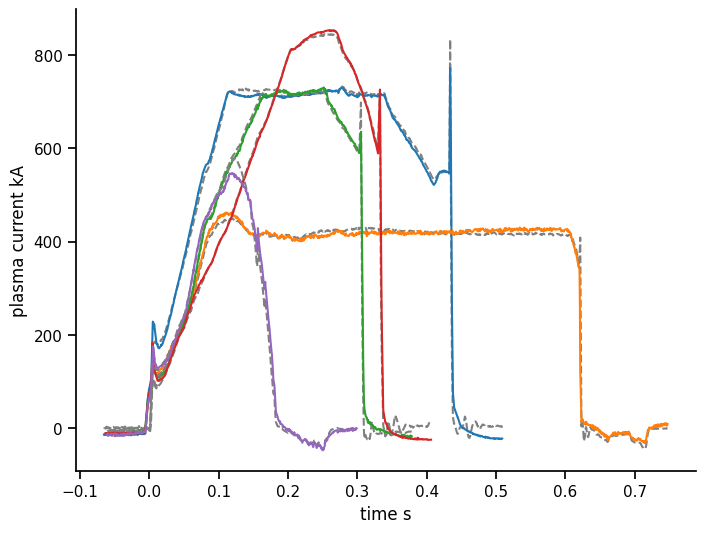

In [537]:
sns.set_context("notebook")
axes = plt.subplots(figsize=(8, 6))[1]

sort_index = np.argsort(X_test.time)
_X_test = X_test.iloc[sort_index]
_y_test = y_test.iloc[sort_index]
for shot_index in np.unique(X_train.shot_index):
    index = _X_test.shot_index == shot_index
    axes.plot(_X_test.loc[index, "time"], _y_test.loc[index], "--", color="gray")
    axes.plot(_X_test.loc[index, "time"], pipe.predict(_X_test)[index])
axes.set_xlabel("time s")
axes.set_ylabel("plasma current kA")
sns.despine()

### Model Assessment and Next Steps

The plot compares actual plasma current (gray dashed lines) with model predictions (colored lines). When evaluating your model, consider these key questions:

1. Do the predictions match your expectations?
2. How accurately does the model fit the data?
3. Is there data leakage between training and validation sets?
4. What methods could fix potential leakage issues?

For improving model performance, consider:
- Using more sophisticated models beyond linear regression
- Implementing feature engineering to enhance signal data
- Applying appropriate preprocessing techniques
- Tuning model hyperparameters

Your final ranking depends on your score on the private leaderboard section, which uses a hidden evaluation dataset.

__Aswers to questions__ _Louis Brusset 20/05/2025_

1.
The predictions are matching the datas well. The tendance is replicated. However, for some pulse there are differencies between the true and predicted values. Expecially, an imaginated surcharge at the begining, a missing surcharge at the end or missing oscillations after the end of the pulse.
In addition, one observe that the prediction matchs better the long-time tendance and less the short-time changes (oscillations, discharges). It's maybe due to the linear effect of the model.

2.
The MAPE and the MAE are both pretty low.
MAPE: 5.023 % (less than 10% is an good results)
MAE: 9.959 kA (10kA over a maximum of 800kA is a good result too)

3.
The splitting between train, validation (and test) set is well-done. But, by shuffeling all the data during splitting, data of a same shot aren't connected anymore. Thus, we might want to use all the data of the same pulse together.

4.
To improve the prediction, we could do:
* change the model for a non-linear one ;
* preprocess the data (normalizing...) ;
* tune learning rate by ensemble methodes ;
* try to differently assemble the train data (to keep coherance; for instance: one pulse = one batch or one sample).

Thus, we will firsly implement a feedforward neural network aiming to find non-linear behavior again.
Then, we will try to implement a recurrent neural network to take into auccount the past value in the same pulse.

In [538]:
### Louis Brusset 20/05/2025

# Find the path to the fair_mast_data directory
path = pathlib.Path().absolute().parent / "fair_mast_data/plasma_current"
print(list(path.glob('*.csv')))

# Load the data
train = pd.read_csv(path / "train.csv")
test = pd.read_csv(path / "test.csv")

print(train.head(2))

[WindowsPath('c:/Users/brussel/Documents/1. ITER Internship/data-science-challenges/fair_mast_data/plasma_current/linear_regression.csv'), WindowsPath('c:/Users/brussel/Documents/1. ITER Internship/data-science-challenges/fair_mast_data/plasma_current/test.csv'), WindowsPath('c:/Users/brussel/Documents/1. ITER Internship/data-science-challenges/fair_mast_data/plasma_current/train.csv')]
   index     time  XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  \
0      0 -0.06560   -0.126953   -0.024414   -0.014648   -0.029297   -0.268555   
1      1 -0.06535   -0.129395   -0.024414   -0.017090   -0.031738   -0.273438   

   XMA_OBR03  XMA_OBR03.1  XMA_OBR06  XMA_OBR06.1  XMA_OBR14  XMA_OBR14.1  \
0  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   
1  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   

   XMA_OBR17  XMA_OBR17.1  shot_index  plasma_current  
0  -0.021973    -0.021973           0       -0.673544  
1  -0.024414    -0.024

## Data Visualization

We are going to visualy explore the dataset to see how the features are and how they interact with other. We focus on the train dataset.
The analysises will be on :
* Descriptive statistics
* Covariance matrix
* Time analysis for a given shot
* Correlation with plasma current
* 

__Louis Brusset__ _20/05/2025_

Descriptive statistics :
                 mean       std
XMA_CCBV04   0.221067  0.369407
XMA_CCBV12   0.173684  0.253565
XMA_CCBV20   0.358865  0.336098
XMA_CCBV28   0.275226  0.281790
XMA_CCBV36   0.458828  0.733195
XMA_OBR03    0.300698  0.237521
XMA_OBR03.1  0.300698  0.237521
XMA_OBR06    0.426040  0.297521
XMA_OBR06.1  0.426040  0.297521
XMA_OBR14   -0.209575  0.127620
XMA_OBR14.1 -0.209575  0.127620


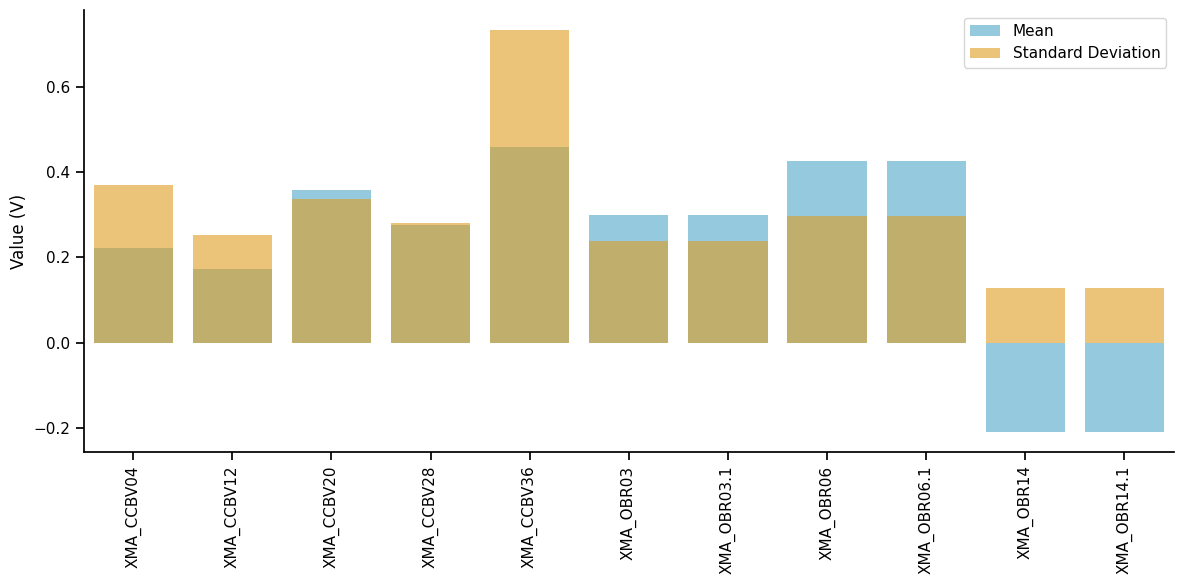

In [539]:
### Louis Brusset 20/05/2025

# remove the first two columns amd making the last one
train_without_index = train.iloc[:, 2:]
train_without_plasma_current = train_without_index.iloc[:, :-2]

# Descriptive statistics
desc_stats = train_without_plasma_current.describe().T[['mean', 'std']] [:-2]
print("Descriptive statistics :")
print(desc_stats)

plt.figure(figsize=(12, 6))

sns.barplot(x=desc_stats.index, y=desc_stats["mean"], color="skyblue", label="Mean")
sns.barplot(x=desc_stats.index, y=desc_stats["std"], color="orange", alpha=0.6, label="Standard Deviation")
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Value (V)")
plt.legend()
plt.tight_layout()
sns.despine()
plt.show()


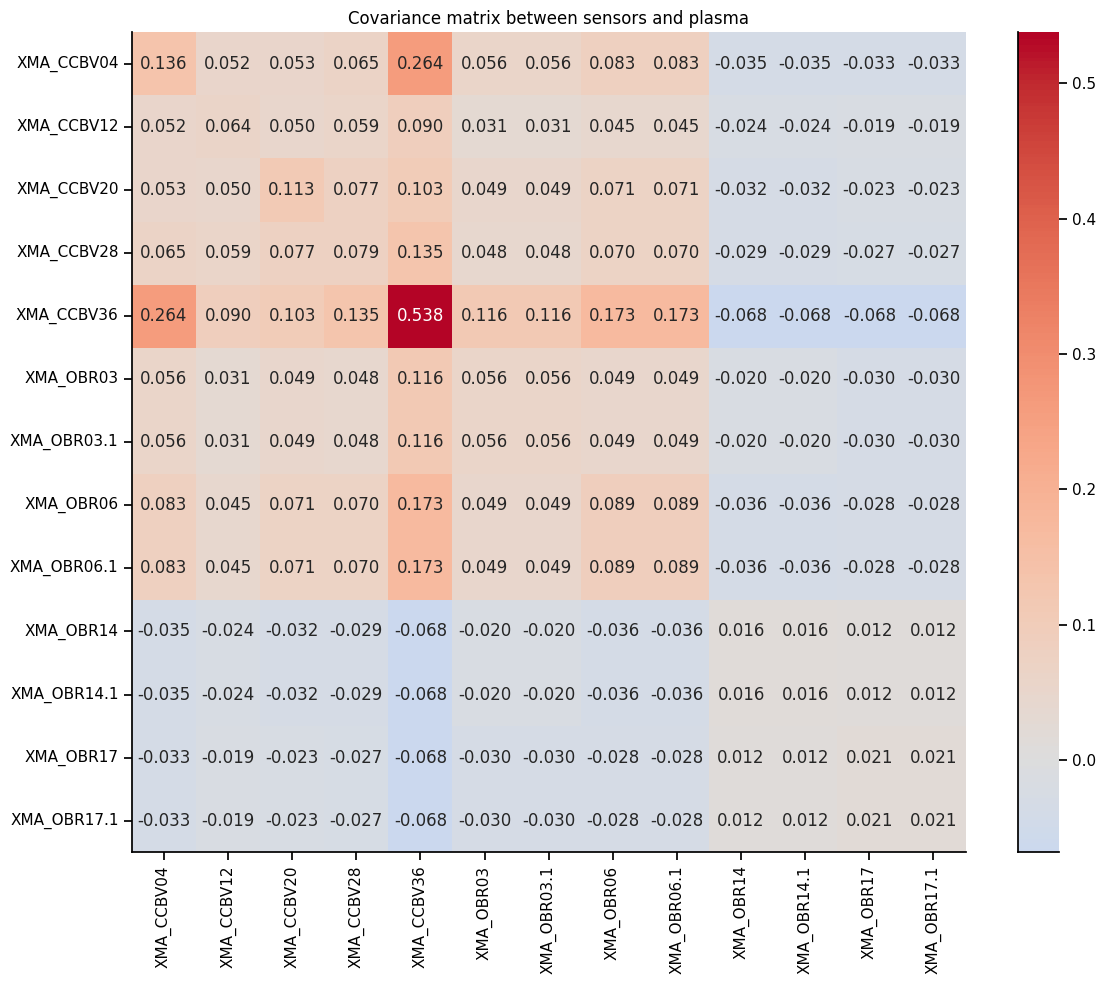

In [540]:
# Covariance matrix

plt.figure(figsize=(12, 10))
cov_matrix = train_without_plasma_current.cov()
sns.heatmap(cov_matrix, annot=True, fmt=".3f", cmap="coolwarm", center=0)
plt.title("Covariance matrix between sensors and plasma")
plt.tight_layout()
sns.despine()
plt.show()


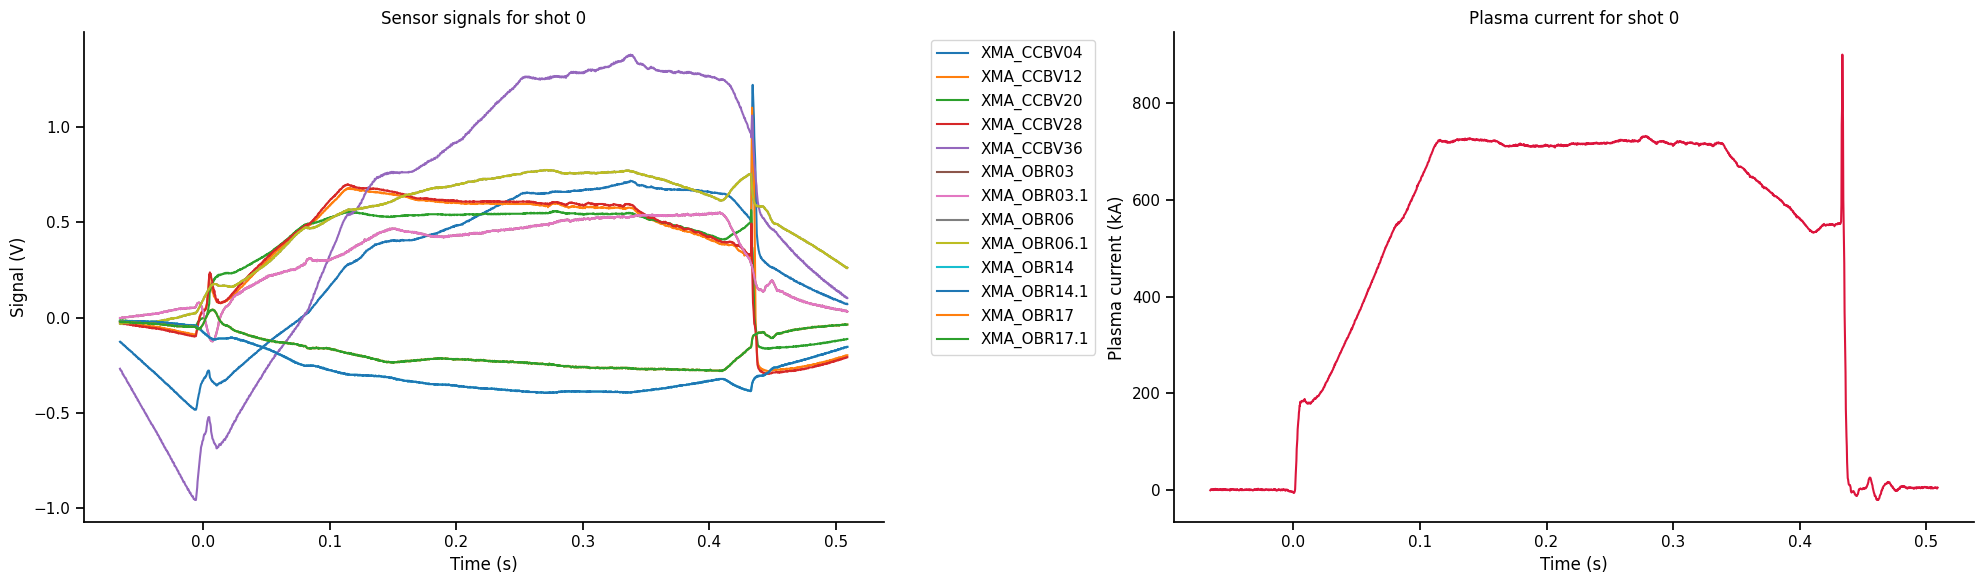

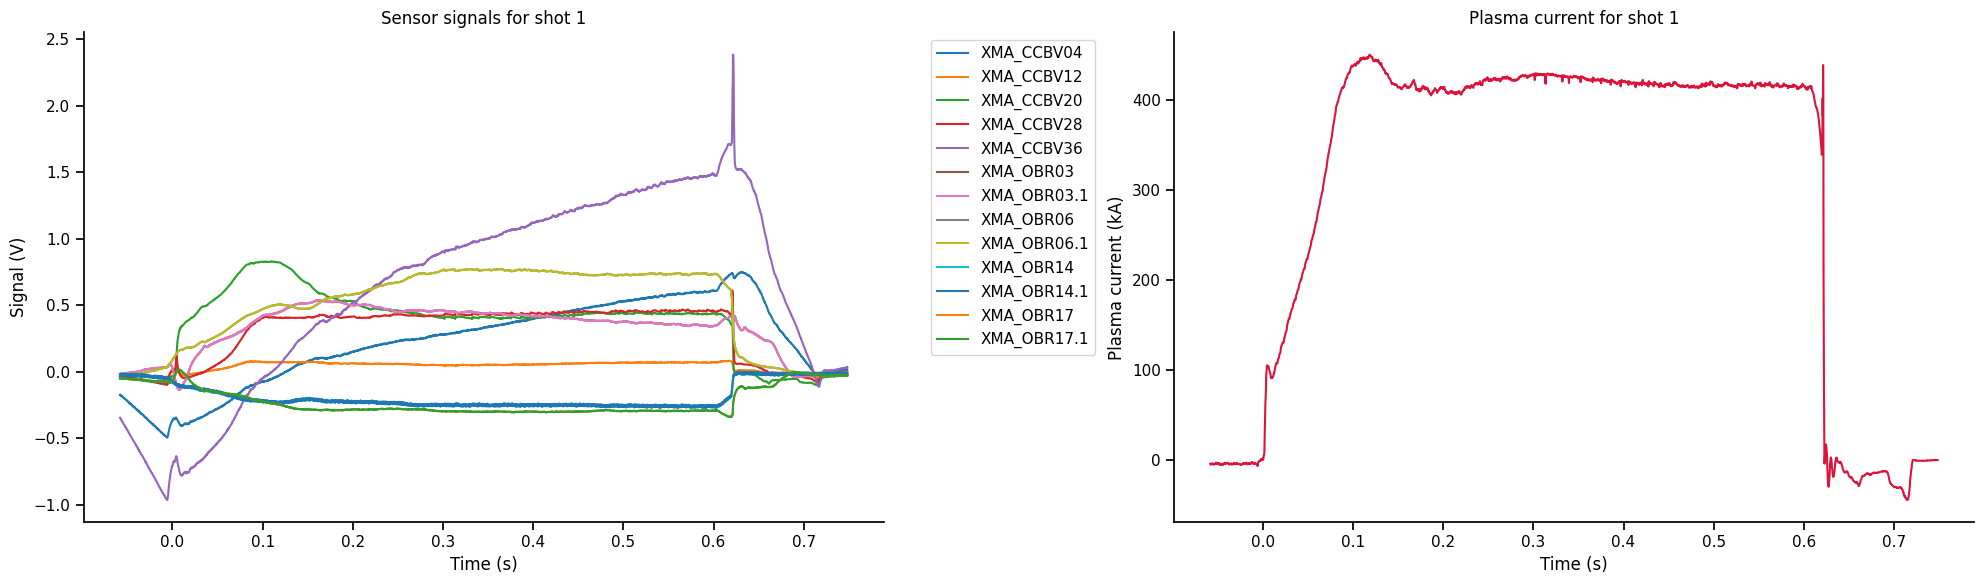

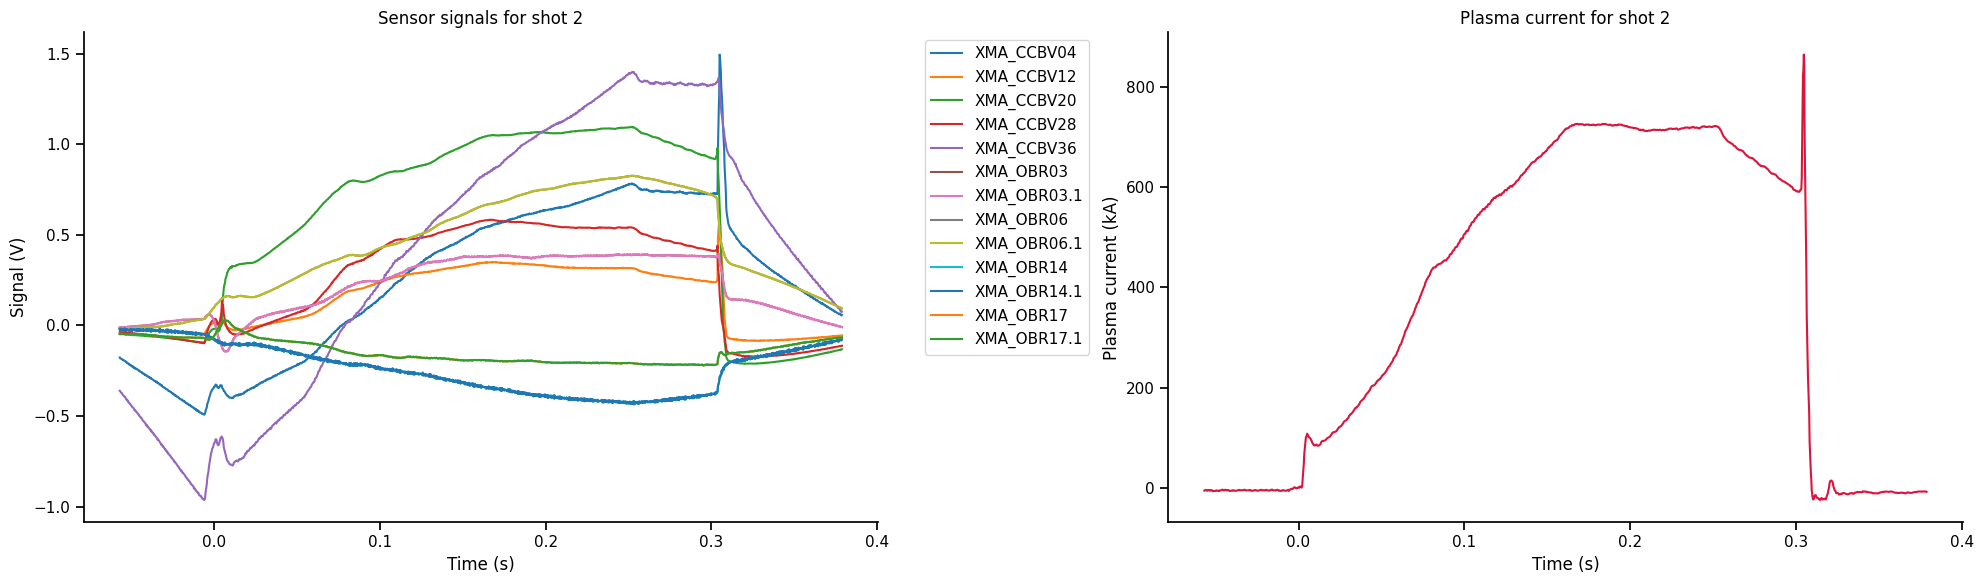

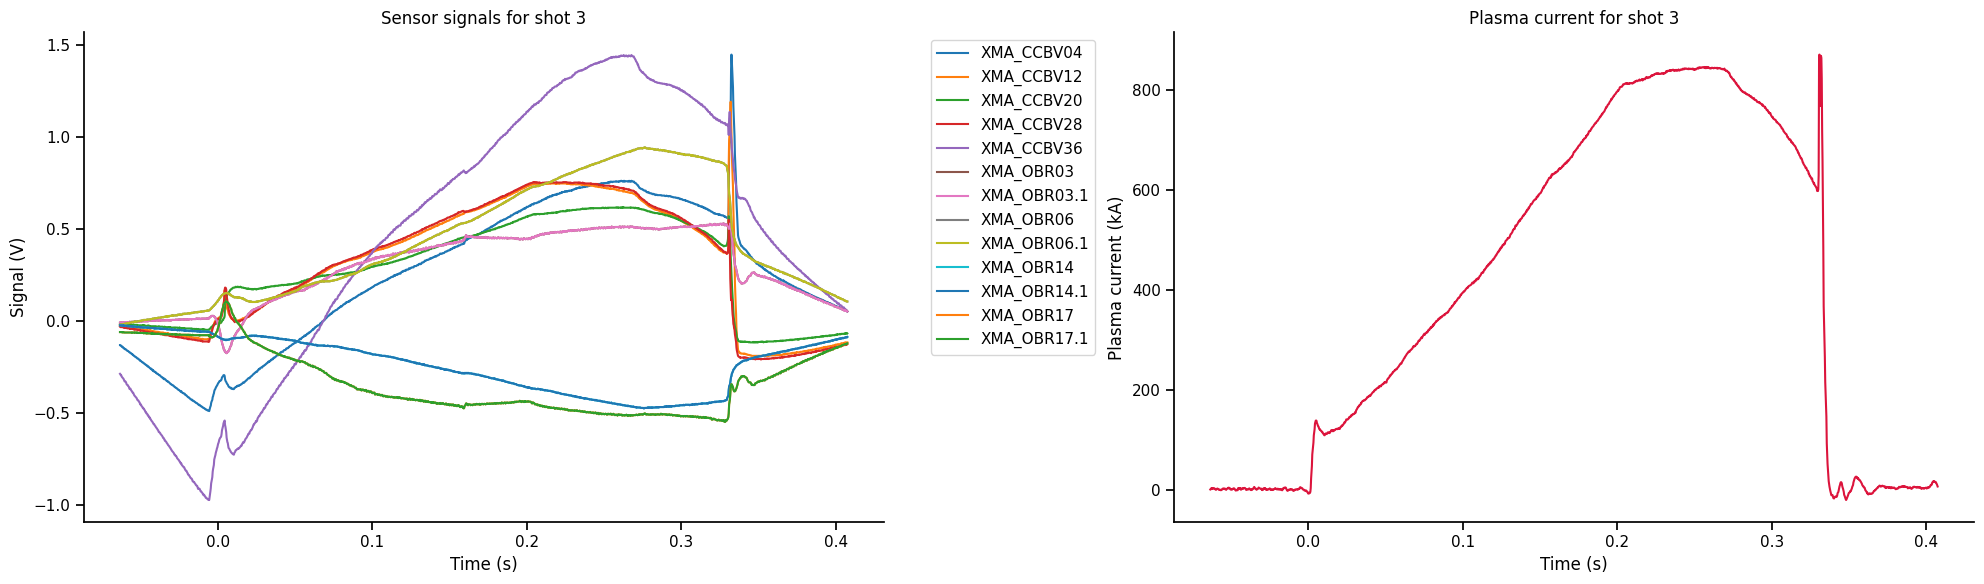

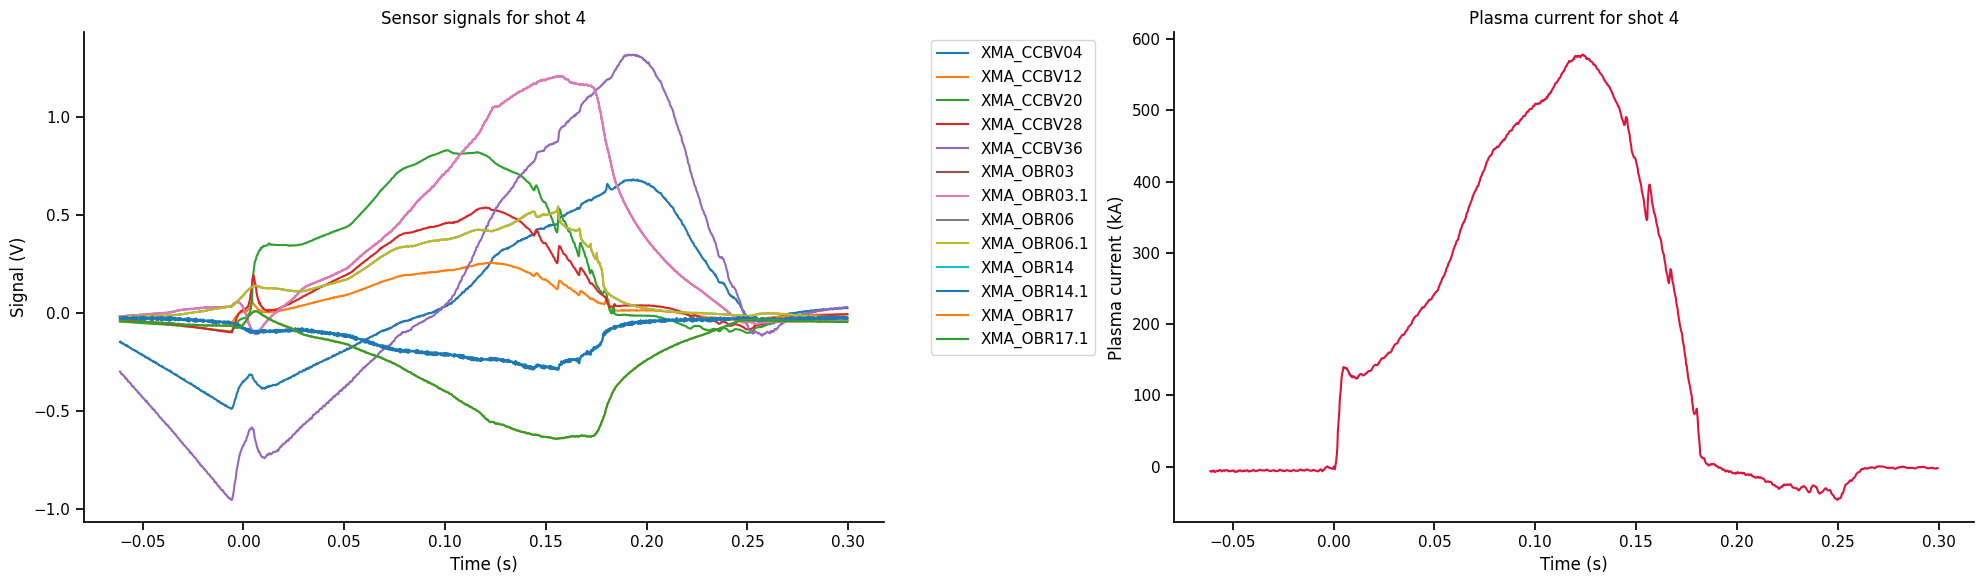

In [541]:
# Time analysis for a given shot

def visualize_shot(shot_id):
    """
    Visualize the evolution of the sensors and the plasma current over time for a given shot.
    """
    df_shot = train[train["shot_index"] == shot_id].sort_values("time")

    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

    for col in train.columns:
        if col.startswith("XMA_"):
            sns.lineplot(data=df_shot, x="time", y=col, ax=ax1, label=col)
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Signal (V)")
    ax1.set_title(f"Sensor signals for shot {shot_id}")
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    sns.despine()

    sns.lineplot(data=df_shot, x="time", y="plasma_current", ax=ax2, color="crimson")
    ax2.set_xlabel("Time (s)")
    ax2.set_ylabel("Plasma current (kA)")
    ax2.set_title(f"Plasma current for shot {shot_id}")
    sns.despine()

    plt.tight_layout()
    plt.show()

for i in range(5):
    visualize_shot(i)


C:\Users\brussel\AppData\Local\Temp\ipykernel_16568\2217298145.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr.index, y=corr.values, palette="viridis")


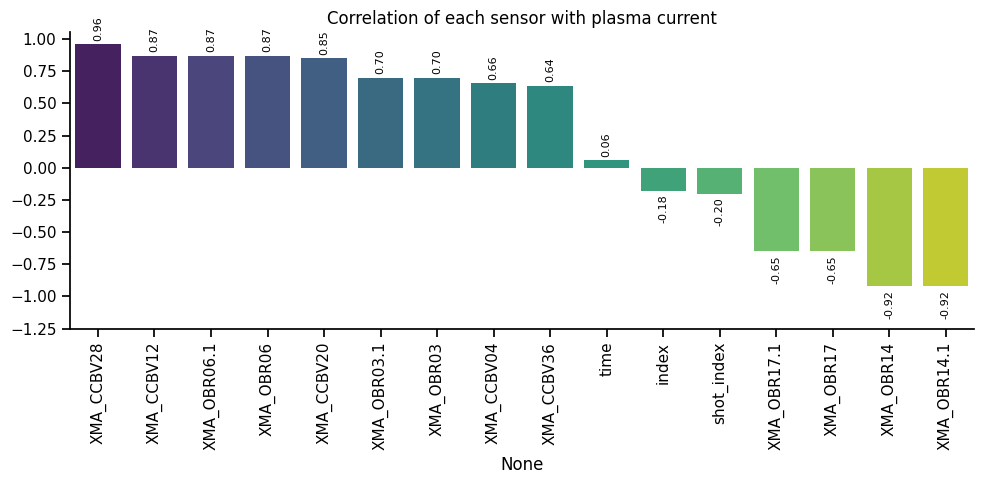

In [542]:
# --- Correlation with plasma current ---
corr = train.corr()["plasma_current"].drop("plasma_current")
corr = corr.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=corr.index, y=corr.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Correlation of each sensor with plasma current")
plt.tight_layout()
plt.yticks(np.arange(-1.25, 1.25, 0.25))
sns.despine()

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.03 * np.sign(height),  # slight offset above or below
        f"{height:.2f}",
        ha="center",
        va="bottom" if height >= 0 else "top",
        fontsize=8,
        rotation=90
    )
plt.show()

### Conclusion

* Descriptive statistics

_We see that the data from alll the captors are pretty gathered; the deviation never exceed 1 in absolute value. Same consideration for the means. Mostly of the means are positive and all are around 0.2 Volts in absolute value._
_In addition, it seems to be three pair of identic features. Thus, we could reduce the dimensionality by droping the redundant ones._

* Covariance matrix

_The covariance matrix confirms to us which was the captor with the highest standard deviation._
_Moreover, it confirms also that 3 colonns seems to have been duplicated. To be sure, we are going to calculate the MSE between colonns and verifying that it is null. (We need to make this check because means and variances can be equal without the data being equal.)_

* Time analysis for a given shot

_We can see that each shot passes throught similar phases: standby > ignition > constant > shut down > oscillations > standby._
_Otherwise, all captors don't contribute in the same manner and some are following very well the plsma current curve._

* Correlation with plasma current

_As we said just before, captors contribute mor or less to the current curve and some contribute positively whereas other negatively._


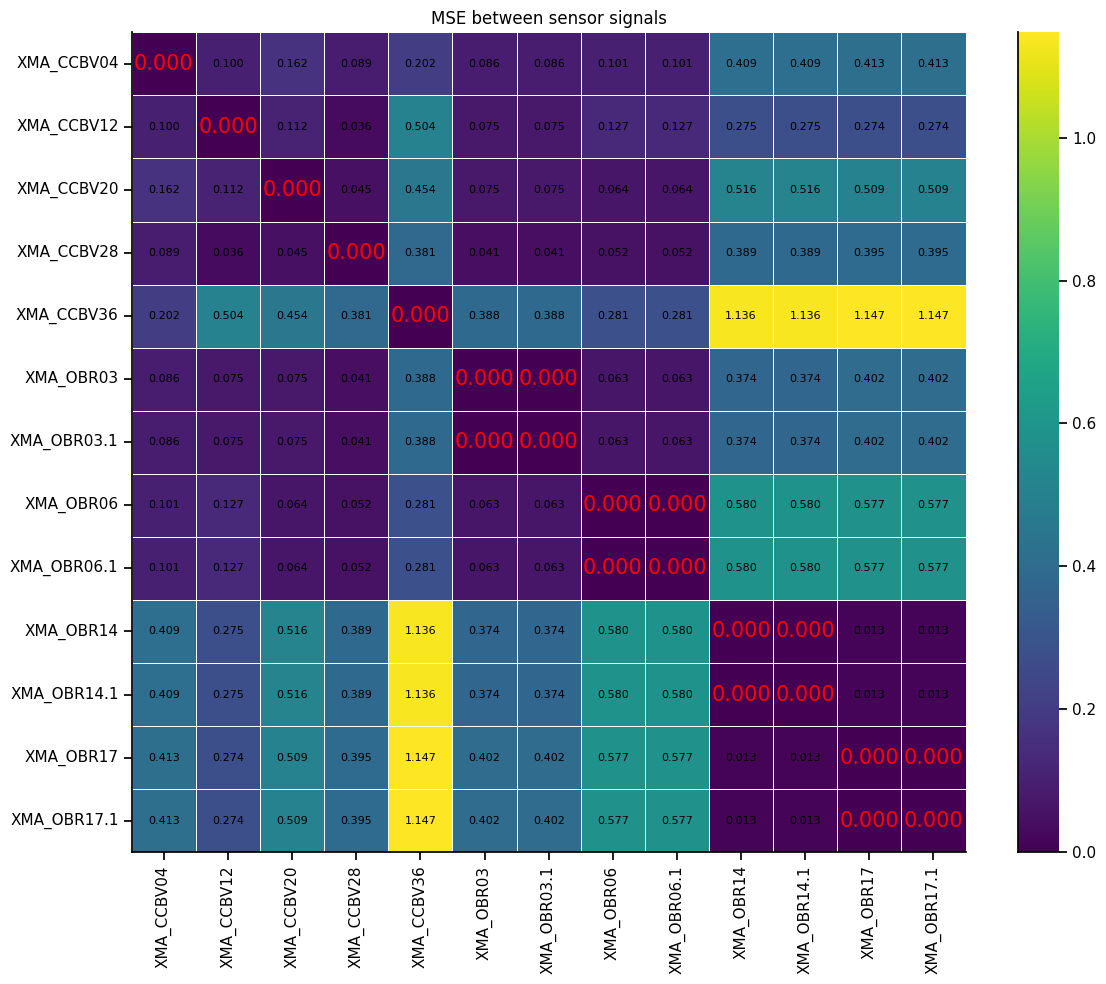

In [543]:
# Calculating MSE between each pair of sensors

columns = train_without_plasma_current.columns
mse_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)

for i in columns:
    for j in columns:
        mse = sklearn.metrics.mean_squared_error(train_without_plasma_current[i], train_without_plasma_current[j])
        mse_matrix.loc[i, j] = mse

plt.figure(figsize=(12, 10))
ax = sns.heatmap(mse_matrix.astype(float), annot=False, fmt=".3f", cmap="viridis", linewidths=0.5)
plt.title("MSE between sensor signals")
sns.despine()
for y in range(mse_matrix.shape[0]):
    for x in range(mse_matrix.shape[1]):
        value = mse_matrix.iloc[y, x]
        color = "red" if np.isclose(value, 0.0) else "black"
        fontsize = 15 if np.isclose(value, 0.0) else 8
        ax.text(x + 0.5, y + 0.5, f"{value:.3f}", ha='center', va='center', color=color, fontsize=fontsize)

plt.tight_layout()
plt.show()

As a conclusion, we can perfectly remove some columns without affecting the results.

The columns to be removed are:

XMA_OBR03.1, XMA_OBR06.1, XMA_OBR14.1, XMA_OBR17.1

In [544]:
# Re-load the data
train = pd.read_csv(path / "train.csv")
test = pd.read_csv(path / "test.csv")

print(train.head(2))

   index     time  XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  \
0      0 -0.06560   -0.126953   -0.024414   -0.014648   -0.029297   -0.268555   
1      1 -0.06535   -0.129395   -0.024414   -0.017090   -0.031738   -0.273438   

   XMA_OBR03  XMA_OBR03.1  XMA_OBR06  XMA_OBR06.1  XMA_OBR14  XMA_OBR14.1  \
0  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   
1  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   

   XMA_OBR17  XMA_OBR17.1  shot_index  plasma_current  
0  -0.021973    -0.021973           0       -0.673544  
1  -0.024414    -0.024414           0       -0.063172  


In [545]:
# Removing the unusefull columns
train2 = train.drop(columns=["index", "XMA_OBR03.1", "XMA_OBR06.1", "XMA_OBR14.1", "XMA_OBR17.1"])

train2.head(2)

,time,XMA_CCBV04,XMA_CCBV12,XMA_CCBV20,XMA_CCBV28,XMA_CCBV36,XMA_OBR03,XMA_OBR06,XMA_OBR14,XMA_OBR17,shot_index,plasma_current
0,-0.06560,-0.126953,-0.024414,-0.014648,-0.029297,-0.268555,-0.002441,-0.031738,-0.019531,-0.021973,0,-0.673544
1,-0.06535,-0.129395,-0.024414,-0.017090,-0.031738,-0.273438,-0.002441,-0.031738,-0.019531,-0.024414,0,-0.063172


## Data preprocessing

The aim is now to prepare the data for the neural network at the best.
So that, we are using preprocessing technics :

* Separation between train set and validation set

* Normalization of the data by values obtained in the train set. (Highly important for FFNN) We must do this on the train set only to avoid data leakage.

* PCA and dropping of the unusefull components. We must do this after the normalization for a better efficiency.

* 


__Louis Brusset__ _20/05/2025_

In [546]:
### Louis Brusset 20/05/2025

# Split the data into features and target variable
# Split the dqtq into test and train sets
X, y = train2.drop("plasma_current", axis=1), train.plasma_current
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=3,
)

print("X_train", X_train.head(2), "\n")
print("X_valid", X_valid.head(2), "\n")
print("y_train", y_train.head(2), "\n")
print("y_valid", y_valid.head(2), "\n")

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_valid shape: ", X_valid.shape)
print("y_valid shape: ", y_valid.shape)

X_train          time  XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  \
9567  0.04230   -0.232219    0.073901    0.404958    0.150072   -0.456089   
3338  0.20155    0.154599    0.062889    0.527386    0.415890    0.523541   

      XMA_OBR03  XMA_OBR06  XMA_OBR14  XMA_OBR17  shot_index  
9567   0.184169   0.146538  -0.105853  -0.136849           4  
3338   0.498507   0.582946  -0.218244  -0.282142           1   

X_valid          time  XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  \
5498  0.74155    0.010268   -0.008382   -0.030105   -0.006292    0.023960   
7508 -0.00365   -0.429688   -0.043945   -0.029297   -0.048828   -0.849609   

      XMA_OBR03  XMA_OBR06  XMA_OBR14  XMA_OBR17  shot_index  
5498  -0.020552  -0.016656  -0.016305  -0.026723           1  
7508   0.026855   0.073242  -0.068359  -0.090332           3   

y_train 9567    216.455429
3338    414.032227
Name: plasma_current, dtype: float64 

y_valid 5498   -0.764023
7508    1.209276
Name: plasm

In [547]:
from sklearn.preprocessing import StandardScaler

# Normalization
nb_nan_rows1 = X_train.isna().any(axis=1).sum()
print(f"Number of Nan rows before : {nb_nan_rows1}")

scaler_for_X = StandardScaler()
columns_to_normalize = [col for col in X_train.columns if col.startswith("XMA_")]
X_train_norm_np = scaler_for_X.fit_transform(X_train[columns_to_normalize])
print("Means:", scaler_for_X.mean_)
print("Variances:", scaler_for_X.var_)
print("----------------------------------------------------------------------------------")
print("New means:", X_train_norm_np.mean(axis=0))
print("New stds:", X_train_norm_np.std(axis=0))

X_train_norm_df = pd.DataFrame(X_train_norm_np, columns=columns_to_normalize)
X_train_norm = pd.concat([X_train.iloc[:, 0], X_train_norm_df, X_train.iloc[:, -1]], axis=1)

nb_nan_rows2 = X_train_norm.isna().any(axis=1).sum()
print(f"Number of Nan rows after : {nb_nan_rows2}")



Number of Nan rows before : 0
Means: [ 0.22069983  0.17494916  0.35936334  0.2757621   0.45762992  0.30043374
  0.42682501 -0.21006541 -0.21512346]
Variances: [0.13739253 0.06492475 0.11253434 0.07963552 0.53981719 0.05582449
 0.08858609 0.01634307 0.02050868]
----------------------------------------------------------------------------------
New means: [-2.09550176e-18 -9.11543264e-18  6.78942569e-17 -4.69392394e-17
 -5.86740492e-18 -8.83253991e-17  1.25730105e-17  1.63449137e-16
  1.42075019e-16]
New stds: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Number of Nan rows after : 3402


In [548]:
print(X_train_norm.head(2))

         time  XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  \
9567  0.04230         NaN         NaN         NaN         NaN         NaN   
3338  0.20155    1.312376   -0.635467   -0.963498   -0.145536    2.378803   

      XMA_OBR03  XMA_OBR06  XMA_OBR14  XMA_OBR17  shot_index  
9567        NaN        NaN        NaN        NaN         4.0  
3338   0.396601   -0.52484   1.482292   0.020987         1.0  


In [549]:
print(X_train_norm_df.head(2))


   XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  XMA_OBR03  \
0   -1.221908   -0.396572    0.135916   -0.445398   -1.243624  -0.492080   
1   -0.178331   -0.439789    0.500870    0.496558    0.089708   0.838328   

   XMA_OBR06  XMA_OBR14  XMA_OBR17  
0  -0.941716   0.815181   0.546574  
1   0.524539  -0.063976  -0.467982  


In [550]:
scaler_for_y = StandardScaler()

nb_nan_rows1 = y_train.isna().sum()
print(f"Number of Nan rows before : {nb_nan_rows1}")

y_train_np = y_train.values.reshape(-1, 1)
y_train_norm_np = scaler_for_y.fit_transform(y_train_np)

# Vérification
print("Mean (before scaling):", scaler_for_y.mean_)
print("Variance (before scaling):", scaler_for_y.var_)
print("--------------------------------------------------")
print("New mean:", y_train_norm_np.mean())
print("New std:", y_train_norm_np.std())

y_train_norm = pd.Series(y_train_norm_np.flatten())

nb_nan_rows2 = y_train_norm.isna().sum()
print(f"Number of Nan rows after : {nb_nan_rows2}")


Number of Nan rows before : 0
Mean (before scaling): [348.04868717]
Variance (before scaling): [78925.67840347]
--------------------------------------------------
New mean: 7.585716360303063e-17
New std: 0.9999999999999999
Number of Nan rows after : 0


Thanksfully, there are no Nan in y_train_norm. Thus we create a mask with X_train_norm and apply it on both the series because 6700 data is enough for our network.

In [551]:
# Boolean mask: True for non-NaN lines
mask = ~X_train_norm.isna().any(axis=1)

X_train_norm_clean = X_train_norm[mask]
y_train_norm_clean = y_train_norm[mask]

print(f"X shape after cleaning: {X_train_norm_clean.shape}")
print(f"y shape after cleaning: {y_train_norm_clean.shape}")

X_train_norm_df_clean = X_train_norm_df[mask]
print(f"X_train_norm_df_clean shape: {X_train_norm_df_clean.shape}")

X shape after cleaning: (6776, 11)
y shape after cleaning: (6776,)
X_train_norm_df_clean shape: (6776, 9)


C:\Users\brussel\AppData\Local\Temp\ipykernel_16568\2047616365.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train_norm_df_clean = X_train_norm_df[mask]


Variance explained by each principal component:
PC           Percentage         Cumulative percentage
PC1:         71.93%              71.93%
PC2:         10.62%              82.56%
PC3:         7.08%              89.63%
PC4:         5.20%              94.83%
PC5:         2.57%              97.40%
PC6:         1.47%              98.87%
PC7:         1.00%              99.88%
PC8:         0.08%              99.96%
PC9:         0.04%              100.00%


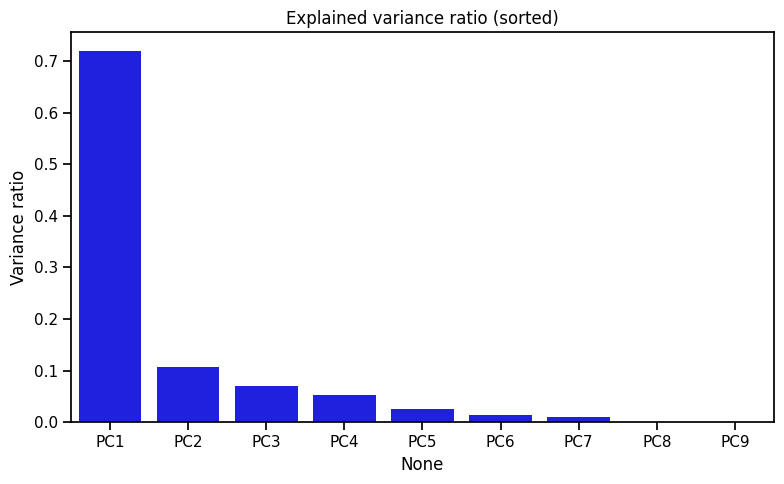

In [552]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_train_norm_df_clean)

explained_var = pd.Series(pca.explained_variance_ratio_, index=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))])
explained_var_sorted = explained_var.sort_values(ascending=False)
print("Variance explained by each principal component:")
print("PC          ", "Percentage        ", "Cumulative percentage")
for pc, value in explained_var_sorted.items():
    print(f"{pc}:         {value * 100:.2f}%              {explained_var_sorted.cumsum()[pc] * 100:.2f}%")

plt.figure(figsize=(8, 5))
sns.barplot(x=explained_var_sorted.index, y=explained_var_sorted.values, color="b")
plt.title("Explained variance ratio (sorted)")
plt.ylabel("Variance ratio")
plt.tight_layout()
plt.show()

PCA shows that the 5 last components are not usefull in the determination of the plasma current.
The last 5 explain less than 5% of the variance, whereas the other explain together 95% of the total variance.
So we are dropping them and focus on the 4 first.

In [553]:
n_components_to_keep = X_pca.shape[1] - 5
X_pca_reduced = X_pca[:, :n_components_to_keep]

print(f"Shape after reduction: {X_pca_reduced.shape}")

Shape after reduction: (6776, 4)


In [554]:
X_preprocessed = X_pca_reduced
y_preprocessed = y_train_norm_clean.values.reshape(-1, 1)

print(f"X type:   {type(X_preprocessed)}")
print(f"y type:   {type(y_preprocessed)}")
print(f"X shape:  {X_preprocessed.shape}")
print(f"y shape:  {y_preprocessed.shape}")

X type:   <class 'numpy.ndarray'>
y type:   <class 'numpy.ndarray'>
X shape:  (6776, 4)
y shape:  (6776, 1)


## Feedfordward Neural Network

Now we implement the neural network with 3 hidden layer and fully-connected.

__Louis Brusset__ _20/05/2025_

In [557]:
from sklearn.neural_network import MLPRegressor

y = y.ravel()

# hidden_layer_sizes=(64, 32, 16) for instance
model = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

model.fit(X, y)
y_pred = model.predict(X)

print("Exemple de prédiction :", y_pred[:5])

C:\Users\brussel\AppData\Local\Temp\ipykernel_16568\1844630256.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = y.ravel()


Exemple de prédiction : [2.73819056 2.43096452 2.19082979 2.28966453 2.67978851]


In [556]:
#X_approx = pca.inverse_transform(X_pca_reduced)